### Rectifying the Outliers

    -> Droping the rows
    
    -> Droping the column
    
    -> Converting those outliers into null values
    
    -> Normalizing the column

### Loading the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
def outliers(data,col):
    global ULP,LLP
    mini = data[col].min()
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.5)
    Q3 = data[col].quantile(0.75)
    maxi = data[col].max()
    IQR = round((Q3 - Q1),2)
    LLP = round((Q1 - (1.5*IQR)),2)
    ULP = round((Q3 + (1.5*IQR)),2)
    LLP_L = len(data[data[col]<LLP])
    ULP_L = len(data[data[col]>ULP])
    
    print('\nColumn Name:',col)
    
    sns.boxplot(data=data,x=col)
    plt.show()
    
    print('Minimum Value in',col,':',mini)
    print('Maximum Value in',col,':',maxi)
    print('Q1 Value in',col,':',Q1)
    print('Q2 Value in',col,':',Q2)
    print('Q3 Value in',col,':',Q3)
    print('IQR Value in',col,':',IQR)
    print('LLP Value in',col,':',LLP)
    print('ULP Value in',col,':',ULP)
    print('Number of outliers below LLP:',LLP_L)
    print('Number of outliers above ULP:',ULP_L)



Column Name: sepal_width


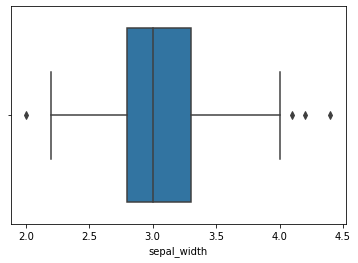

Minimum Value in sepal_width : 2.0
Maximum Value in sepal_width : 4.4
Q1 Value in sepal_width : 2.8
Q2 Value in sepal_width : 3.0
Q3 Value in sepal_width : 3.3
IQR Value in sepal_width : 0.5
LLP Value in sepal_width : 2.05
ULP Value in sepal_width : 4.05
Number of outliers below LLP: 1
Number of outliers above ULP: 3


In [3]:
outliers(df,'sepal_width')

### Removing outliers rows

In [4]:
df_u = df[df['sepal_width']< ULP]

In [5]:
df_u.shape

(147, 5)

In [6]:
df_l = df_u[df_u['sepal_width']> LLP]

In [7]:
df_l.shape

(146, 5)

### Convert outlier values to null

In [8]:
df.shape

(150, 5)

In [9]:
df['sepal_width'].isnull().sum()

0

In [10]:
df['sepal_width'] = np.where(df['sepal_width']<LLP, np.nan, df['sepal_width'])

In [11]:
df['sepal_width'].isnull().sum()

1

In [12]:
df['sepal_width'] = np.where(df['sepal_width']>ULP, np.nan, df['sepal_width'])

In [13]:
df['sepal_width'].isnull().sum()

4

In [14]:
df.shape

(150, 5)

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
species         0
dtype: int64